## *Regression Model to predict calories burned based on activity and sleep data*

## *Regression Model to predict calories burned based on activity and sleep data*

### Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load and Explore the Data

In [7]:
df = pd.read_csv("MySteps.csv")
df.head()

,Full_date,Day_Name,steps,Activity,distance,runDistance,calories,Year,Month Name,DayType,Full_date (Quarter),Full_date (Month Index),Full_date (Month),deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,01-May-16,Sunday,3869,Low,2651,0,244,2016,May,Weekend,Qtr2,5,May,0,0,0,1461708000,1461708000
1,08-May-16,Sunday,4088,Low,3119,0,197,2016,May,Weekend,Qtr2,5,May,158,262,2,1461801240,1461826560
2,09-May-16,Monday,1958,Low,1266,0,134,2016,May,Weekday,Qtr2,5,May,234,241,0,1461883500,1461912000
3,11-May-16,Wednesday,2569,Low,1661,0,198,2016,May,Weekday,Qtr2,5,May,239,318,0,1461979500,1462012920
4,13-May-16,Friday,4276,Low,2809,0,251,2016,May,Weekday,Qtr2,5,May,180,333,3,1462065840,1462096800


### EDA

In [10]:
print(df.isnull().sum())

Full_date                  0
Day_Name                   0
steps                      0
Activity                   0
distance                   0
runDistance                0
calories                   0
Year                       0
Month Name                 0
DayType                    0
Full_date (Quarter)        0
Full_date (Month Index)    0
Full_date (Month)          0
deepSleepTime              0
shallowSleepTime           0
wakeTime                   0
start                      0
stop                       0
dtype: int64


In [12]:
df.info

<bound method DataFrame.info of       Full_date   Day_Name  steps  Activity  distance  runDistance  calories  \
0     01-May-16     Sunday   3869       Low      2651            0       244   
1     08-May-16     Sunday   4088       Low      3119            0       197   
2     09-May-16     Monday   1958       Low      1266            0       134   
3     11-May-16  Wednesday   2569       Low      1661            0       198   
4     13-May-16     Friday   4276       Low      2809            0       251   
...         ...        ...    ...       ...       ...          ...       ...   
2449  10-Oct-22     Monday   6497  Moderate      4735         3727       228   
2450  17-Oct-22     Monday   8660  Moderate      6181         4954       285   
2451  24-Oct-22     Monday   8192  Moderate      5900         4632       547   
2452  21-Nov-22     Monday   6923  Moderate      4708         3735       246   
2453  02-Jan-23     Monday   8093  Moderate      5795         4504       284   

      Y

### Select Relevant Features
Since I am predicting calories burned,That's why choosing the meaningful features:

In [26]:
features = ["steps", "distance", "runDistance", "deepSleepTime", "shallowSleepTime", "wakeTime"]
target = "calories"

# Extract features (X) and target variable (y)
X = df[features].copy()
y = df[target]

### Handling Missing Values (if any)
Replace missing values with the mean of the respective column:

In [28]:
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

### Split Data into Training and Testing Sets
split the data into 80% training and 20% testing.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Regression models perform better when features are on a similar scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train the Regression Model
Will use Linear Regression to train the model.

In [40]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
# Now, let's predict calories for the test data.
y_pred = model.predict(X_test_scaled)

### Model Evaluation 

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 50.80383550693082
Mean Squared Error (MSE): 11966.718080643264
R-squared (R²) Score: 0.7707471659465934


### Visualization 

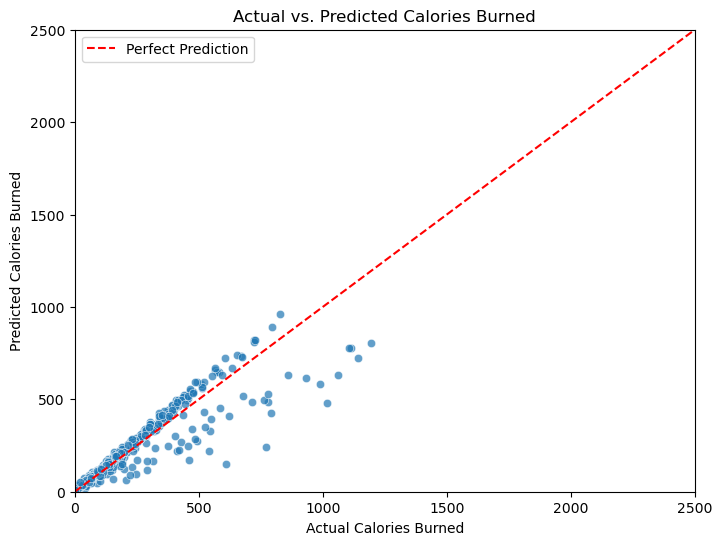

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs. Predicted Calories Burned")

plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.plot([0, 2500], [0, 2500], color='red', linestyle='--', label="Perfect Prediction")
plt.legend()
plt.show()

### Summary 

- This notebook focuses on predicting calories burned using a dataset with features like steps, distance, run distance, and sleep times.  
- A Linear Regression model is built to predict calories burned based on these features.  
- The dataset is preprocessed by handling missing values, splitting into training and testing sets, and scaling the features.  
- The model is trained and evaluated, achieving an **R-squared (R²) score of 0.77, indicating a good fit, with a Mean Absolute Error (MAE) of 50.80 and Mean Squared Error (MSE) of 11,966.72.**

- A scatter plot is used to visualize the relationship between **Actual vs. Predicted Calories Burned**, with axes limited to 2500 calories for better focus.  
- A diagonal red dashed line is added to represent perfect predictions, showing how closely the model's predictions align with the actual values.  
- Most predictions are distributed around this line, though some outliers suggest room for improvement.

